In [7]:
#  from:    https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
url = 'https://www.drugabuse.gov/sites/default/files/overdose_data_1999-2015.xls'

overdoses = pd.read_excel('https://www.drugabuse.gov/sites/default/files/overdose_data_1999-2015.xls', sheetname='Online', skiprows=6)

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [3]:
# this is a function for pulling data from a row of the df
def get_data(table, rownum, title):
  data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
  data.columns = {title}
  return data

In [4]:
%matplotlib notebook
title = 'Heroin Overdoses'
d = get_data(overdoses, 18, title)
x = np.array(d.index)
y = np.array(d['Heroin Overdoses'])
overdose = pd.DataFrame(y,x)
#XN,YN = augment(x,y,10)
#augmented = pd.DataFrame(YN,XN)
overdose.columns = {title}

In [10]:
# this has to do with animation
writer1 = animation.writers['ffmpeg']
writer = writer1(fps=20, metadata=dict(artist='Me'), bitrate=1800)

RuntimeError: Requested MovieWriter (ffmpeg) not available

<IPython.core.display.Javascript object>


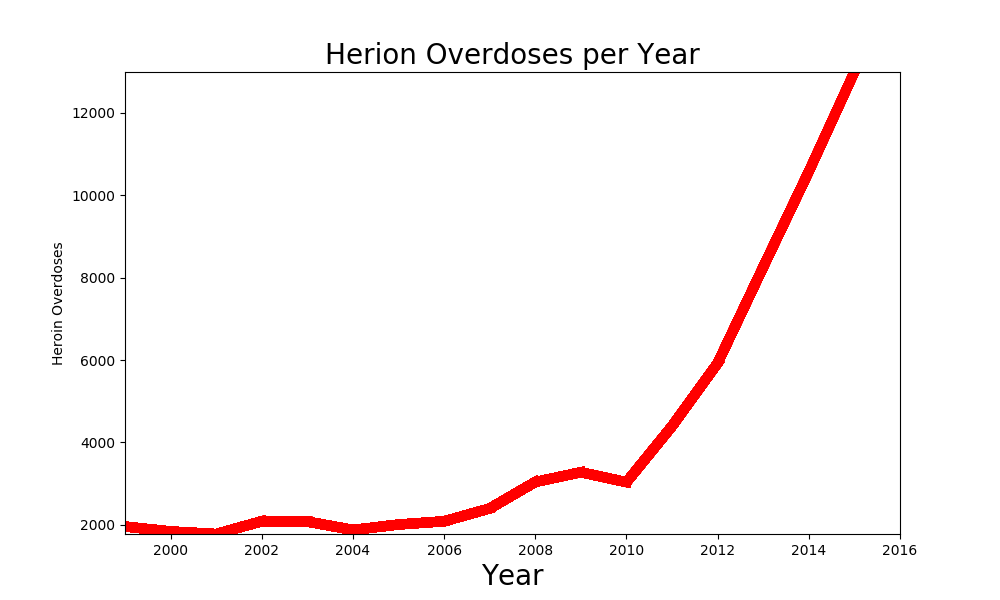

In [12]:
# this basically sets up our figure

fig = plt.figure(figsize=(10,6))
plt.xlim(1999, 2016)
plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xlabel('Year', fontsize=20)
plt.title('Herion Overdoses per Year', fontsize=20)

# now we set up the animation function
def animate(i):
  data = overdose.iloc[:int(i+1)] #this selects our data range
  p = sns.lineplot(x=data.index, y=data[title], data=data,
                  color="r")
  plt.setp(p.lines, linewidth=7)
  

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17,
                                        repeat = True)

# you can save the animation with the writer
# ani.save('HeroinOverdosesJumpy.mp4', writer=writer)
ani
plt.show()